<a href="https://colab.research.google.com/github/bonjon/Ro.Bo./blob/main/CV_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Video Capture

In [45]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;

      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => setTimeout(resolve,5000));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [87]:
import cv2
import mediapipe as mp
import numpy as np

def tPose(input):
  mp_drawing = mp.solutions.drawing_utils
  mp_drawing_styles = mp.solutions.drawing_styles
  mp_pose = mp.solutions.pose
  t_pose = False
  # For static images:
  IMAGE_FILES = [input]
  BG_COLOR = (192, 192, 192) # gray
  with mp_pose.Pose(
      static_image_mode=True,
      model_complexity=2,
      enable_segmentation=True,
      min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
      image = cv2.imread(file)
      image_height, image_width, _ = image.shape
      # Convert the BGR image to RGB before processing.
      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      if not results.pose_landmarks:
        continue
      # save the y coordinates
      left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height
      right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height
      left_elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_width
      right_elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_width
      left_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_width
      right_wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_width
      # function that checks if the coordinates are aligned
      median = (left_shoulder + right_shoulder) / 2
      if alignment(median, left_elbow) and alignment(median, right_elbow) and alignment(median, left_wrist) and alignment(median, right_wrist):
        t_pose = True
      else:
        t_pose = False
      annotated_image = image.copy()
      # Draw segmentation on the image.
      # To improve segmentation around boundaries, consider applying a joint
      # bilateral filter to "results.segmentation_mask" with "image".
      condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
      bg_image = np.zeros(image.shape, dtype=np.uint8)
      bg_image[:] = BG_COLOR
      annotated_image = np.where(condition, annotated_image, bg_image)
      # Draw pose landmarks on the image.
      mp_drawing.draw_landmarks(
          annotated_image,
          results.pose_landmarks,
          mp_pose.POSE_CONNECTIONS,
          landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
      cv2.imwrite('/content/annotated_image' + str(idx) + '.png', annotated_image)
      return t_pose
      # Plot pose world landmarks.
      #mp_drawing.plot_landmarks(
      #    results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)


def alignment(y1, y2):
  difference = abs(y1 - y2)
  if difference <= 150:
    return True
  else:
    return False

<IPython.core.display.Javascript object>

Saved to photo.jpg


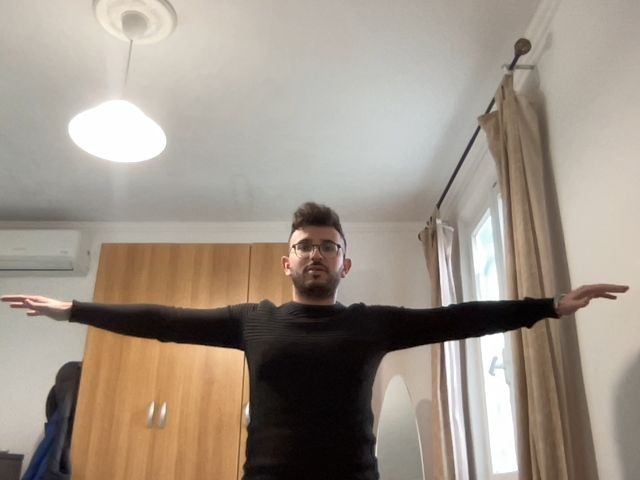

In [91]:
from IPython.display import Image
try:
  is_t_pose = False
  while not is_t_pose:
    filename = take_photo()
    if tPose(filename):
      print('Saved to {}'.format(filename))
      is_t_pose = True
    else:
      print("Please stand in a T-Pose")
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Pifu workflow

#Automatically remove background with carvekit

In [ ]:
%cd /content
!pip install carvekit_colab

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.1 MB/s eta 0:00:00
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=4afcabf0cfbca0e95fcd4d06a2da804873999d3c399d9eb150cb2e00db7a9efb
  Stored in directory: /root/.cache/pip/w

In [ ]:
#@title Download all models
from carvekit.ml.files.models_loc import download_all

download_all();

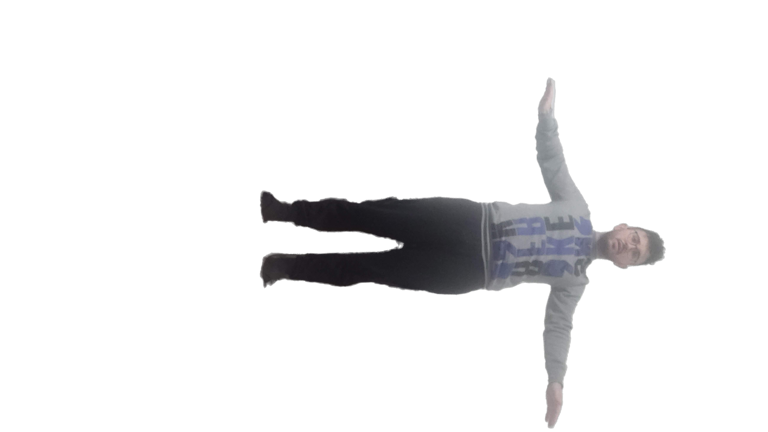

In [ ]:
#@title Upload images from your computer
#@markdown Description of parameters
#@markdown - `SHOW_FULLSIZE`  - Shows image in full size (may take a long time to load)
#@markdown - `PREPROCESSING_METHOD`  - Preprocessing method
#@markdown - `SEGMENTATION_NETWORK`  - Segmentation network. Use `u2net` for hairs-like objects and `tracer_b7` for objects
#@markdown - `POSTPROCESSING_METHOD`  - Postprocessing method
#@markdown - `SEGMENTATION_MASK_SIZE` - Segmentation mask size. Use 640 for Tracer B7 and 320 for U2Net
#@markdown - `TRIMAP_DILATION`  - The size of the offset radius from the object mask in pixels when forming an unknown area
#@markdown - `TRIMAP_EROSION`  - The number of iterations of erosion that the object's mask will be subjected to before forming an unknown area
#@markdown > Look README.md and code for more details on networks and methods


import torch
import PIL
from IPython import display
from google.colab import files
from carvekit.web.schemas.config import MLConfig
from carvekit.web.utils.init_utils import init_interface

SHOW_FULLSIZE = False #@param {type:"boolean"}
PREPROCESSING_METHOD = "stub" #@param ["stub", "none"]
SEGMENTATION_NETWORK = "tracer_b7" #@param ["u2net", "deeplabv3", "basnet", "tracer_b7"]
POSTPROCESSING_METHOD = "fba" #@param ["fba", "none"] 
SEGMENTATION_MASK_SIZE = 640 #@param ["640", "320"] {type:"raw", allow-input: true}
TRIMAP_DILATION = 30 #@param {type:"integer"}
TRIMAP_EROSION = 5 #@param {type:"integer"}
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


config = MLConfig(segmentation_network=SEGMENTATION_NETWORK,
                  preprocessing_method=PREPROCESSING_METHOD,
                  postprocessing_method=POSTPROCESSING_METHOD,
                  seg_mask_size=SEGMENTATION_MASK_SIZE,
                  trimap_dilation=TRIMAP_DILATION,
                  trimap_erosion=TRIMAP_EROSION,
                  device=DEVICE)


interface = init_interface(config)




uploaded = files.upload().keys()
display.clear_output()
images = interface(uploaded)
for im in enumerate(images):
  if not SHOW_FULLSIZE:
    im[1].thumbnail((768, 768), resample=3)
  im[1].save("/content/giua.png")
  display.display(im[1])


## Clone PIFuHD repository and setup



In [ ]:
#clone repository
!git clone https://github.com/facebookresearch/pifuhd
#change to sample images
%cd /content/pifuhd/sample_images

#upload your own files
from google.colab import files

filename = list(files.upload().keys())[0]

#set image paths
import os

try:
  image_path = '/content/pifuhd/sample_images/%s' % filename
except:
  image_path = '/content/pifuhd/sample_images/test.png' # example image
image_dir = os.path.dirname(image_path)
file_name = os.path.splitext(os.path.basename(image_path))[0]

# output pathes
obj_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.obj' % file_name
out_img_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.png' % file_name
video_path = '/content/pifuhd/results/pifuhd_final/recon/result_%s_256.mp4' % file_name
video_display_path = '/content/pifuhd/results/pifuhd_final/result_%s_256_display.mp4' % file_name

%cd /content

Cloning into 'pifuhd'...
remote: Enumerating objects: 213, done.
remote: Total 213 (delta 0), reused 0 (delta 0), pack-reused 213
Receiving objects: 100% (213/213), 402.72 KiB | 14.92 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/pifuhd/sample_images


Saving giua.png to giua.png
/content


## Preprocess (for cropping image)

In [ ]:
!git clone https://github.com/Daniil-Osokin/lightweight-human-pose-estimation.pytorch.git
%cd /content/lightweight-human-pose-estimation.pytorch/
!wget https://download.01.org/opencv/openvino_training_extensions/models/human_pose_estimation/checkpoint_iter_370000.pth

fatal: destination path 'lightweight-human-pose-estimation.pytorch' already exists and is not an empty directory.
/content/lightweight-human-pose-estimation.pytorch
--2023-01-17 11:39:39--  https://download.01.org/opencv/openvino_training_extensions/models/human_pose_estimation/checkpoint_iter_370000.pth
Resolving download.01.org (download.01.org)... 184.86.202.186, 2600:1409:9800:789::4b21, 2600:1409:9800:78d::4b21
Connecting to download.01.org (download.01.org)|184.86.202.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87959810 (84M) [application/octet-stream]
Saving to: ‘checkpoint_iter_370000.pth.2’

checkpoint_iter_370 100%[===================>]  83.88M  85.7MB/s    in 1.0s    

2023-01-17 11:39:41 (85.7 MB/s) - ‘checkpoint_iter_370000.pth.2’ saved [87959810/87959810]



In [ ]:
import torch
import cv2
import numpy as np
from models.with_mobilenet import PoseEstimationWithMobileNet
from modules.keypoints import extract_keypoints, group_keypoints
from modules.load_state import load_state
from modules.pose import Pose, track_poses
import demo

def get_rect(net, images, height_size):
    net = net.eval()

    stride = 8
    upsample_ratio = 4
    num_keypoints = Pose.num_kpts
    previous_poses = []
    delay = 33
    for image in images:
        rect_path = image.replace('.%s' % (image.split('.')[-1]), '_rect.txt')
        img = cv2.imread(image, cv2.IMREAD_COLOR)
        orig_img = img.copy()
        orig_img = img.copy()
        heatmaps, pafs, scale, pad = demo.infer_fast(net, img, height_size, stride, upsample_ratio, cpu=False)

        total_keypoints_num = 0
        all_keypoints_by_type = []
        for kpt_idx in range(num_keypoints):  # 19th for bg
            total_keypoints_num += extract_keypoints(heatmaps[:, :, kpt_idx], all_keypoints_by_type, total_keypoints_num)

        pose_entries, all_keypoints = group_keypoints(all_keypoints_by_type, pafs)
        for kpt_id in range(all_keypoints.shape[0]):
            all_keypoints[kpt_id, 0] = (all_keypoints[kpt_id, 0] * stride / upsample_ratio - pad[1]) / scale
            all_keypoints[kpt_id, 1] = (all_keypoints[kpt_id, 1] * stride / upsample_ratio - pad[0]) / scale
        current_poses = []

        rects = []
        for n in range(len(pose_entries)):
            if len(pose_entries[n]) == 0:
                continue
            pose_keypoints = np.ones((num_keypoints, 2), dtype=np.int32) * -1
            valid_keypoints = []
            for kpt_id in range(num_keypoints):
                if pose_entries[n][kpt_id] != -1.0:  # keypoint was found
                    pose_keypoints[kpt_id, 0] = int(all_keypoints[int(pose_entries[n][kpt_id]), 0])
                    pose_keypoints[kpt_id, 1] = int(all_keypoints[int(pose_entries[n][kpt_id]), 1])
                    valid_keypoints.append([pose_keypoints[kpt_id, 0], pose_keypoints[kpt_id, 1]])
            valid_keypoints = np.array(valid_keypoints)
            
            if pose_entries[n][10] != -1.0 or pose_entries[n][13] != -1.0:
              pmin = valid_keypoints.min(0)
              pmax = valid_keypoints.max(0)

              center = (0.5 * (pmax[:2] + pmin[:2])).astype(np.int)
              radius = int(0.65 * max(pmax[0]-pmin[0], pmax[1]-pmin[1]))
            elif pose_entries[n][10] == -1.0 and pose_entries[n][13] == -1.0 and pose_entries[n][8] != -1.0 and pose_entries[n][11] != -1.0:
              # if leg is missing, use pelvis to get cropping
              center = (0.5 * (pose_keypoints[8] + pose_keypoints[11])).astype(np.int)
              radius = int(1.45*np.sqrt(((center[None,:] - valid_keypoints)**2).sum(1)).max(0))
              center[1] += int(0.05*radius)
            else:
              center = np.array([img.shape[1]//2,img.shape[0]//2])
              radius = max(img.shape[1]//2,img.shape[0]//2)

            x1 = center[0] - radius
            y1 = center[1] - radius

            rects.append([x1, y1, 2*radius, 2*radius])

        np.savetxt(rect_path, np.array(rects), fmt='%d')

In [ ]:
net = PoseEstimationWithMobileNet()
checkpoint = torch.load('checkpoint_iter_370000.pth', map_location='cpu')
load_state(net, checkpoint)

get_rect(net.cuda(), [image_path], 512)

<ipython-input-30-1919f42bf24c>:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  center = (0.5 * (pmax[:2] + pmin[:2])).astype(np.int)


## Download the Pretrained Model

In [ ]:
%cd /content/pifuhd/
!sh ./scripts/download_trained_model.sh

/content/pifuhd


## Run PIFuHD!


In [ ]:
# Warning: all images with the corresponding rectangle files under -i will be processed. 
!python -m apps.simple_test -r 256 --use_rect -i $image_dir

# seems that 256 is the maximum resolution that can fit into Google Colab. 
# If you want to reconstruct a higher-resolution mesh, please try with your own machine. 

Resuming from  ./checkpoints/pifuhd.pt
test data size:  1
initialize network with normal
initialize network with normal
generate mesh (test) ...
  0% 0/1 [00:00<?, ?it/s]./results/pifuhd_final/recon/result_giua_360.obj
tcmalloc: large alloc 1119748096 bytes == 0xa77fa000 @  0x7fb018a9f1e7 0x7fb0163e914e 0x7fb016441745 0x7fb0164419bf 0x7fb0164e4773 0x5aae14 0x49abe4 0x55cd91 0x5d8941 0x4997c7 0x5d8868 0x4c8291 0x518079 0x55e284 0x55cd91 0x5d8941 0x4990ca 0x55d078 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x49abe4 0x55d078 0x5d8941 0x4990ca 0x55cd91 0x5d8941 0x4990ca 0x55cd91 0x55d743
tcmalloc: large alloc 1492992000 bytes == 0x143bb0000 @  0x7fb018a9f1e7 0x7fb0163e914e 0x7fb016441745 0x7fb0164ea961 0x7fb0164eb29f 0x7fb0164eb3ec 0x5d80be 0x7fb01642b944 0x5d814d 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x4997c7 0x55d078 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x49abe4 0x55d078 0x5d8941 0x4990ca 0x55cd91 0x5d8941 0x4990ca 0x55cd91 0x55d743 0x627376 0x5aaeb9 0x4990ca
tcmalloc: large alloc 1492992000 bytes

In [ ]:
#Delete previous results 

!rm -rf results
#to_remove = filename[:-4] + "*"
#os.system("rm sample_images/{}".format(filename))

# RigNet workflow

TODO: automatically rename and remesh file

## Install dependencies

In [ ]:
!pip install open3d>=0.9.0
!pip install trimesh[easy]

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!apt-get install xvfb

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 31.6 MB/s eta 0:00:00


## Clone RigNet fork modified to work on colab/headless server

In [ ]:
%cd /content

#clone forked repo
!git clone https://github.com/bonjon/RigNet.git

#setup checkpoints
#create a folder named CV in drive and put the checkpoints here
#or simply upload and unzip it in rignet folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cp -r /content/drive/MyDrive/CV/trained_models/checkpoints /content/RigNet

## Move PifuHD results into quickstart

In [ ]:
result_filename = "result_" + filename[:-4] + "_256.obj" 
file_position = "/content/pifuhd/results/pifuhd_final/recon/{}".format(result_filename)
os.system("cp {} /content/RigNet/quick_start".format(file_position))

0

## Run the model

In [ ]:
%cd RigNet
!python3 quick_start.py

loading all networks...
     joint prediction network loaded.
     root prediction network loaded.
     connection prediction network loaded.
     skinning prediction network loaded.
creating data for model ID result
     gathering topological edges.
     calculating surface geodesic matrix.
surface geodesic calculation: 7.603269100189209 seconds
     gathering geodesic edges.
predicting joints
predicting connectivity
predicting skinning
     calculating volumetric geodesic distance from vertices to bone. This step takes some time...
     filtering skinning prediction
Saving result
[Open3D WARNING] Unable to load file quick_start/result_ori.obj with ASSIMP
Done!
